In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset using pandas
data = pd.read_csv('btc_historical_data.csv')

# Display the first few rows of the dataset for inspection
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
                  time      open      high      low    close      volumeto
0  2018-02-01 00:00:00  10226.86  10280.84  8726.95  9114.72  1.964309e+09
1  2018-02-02 00:00:00   9114.73   9147.93  7786.20  8870.82  2.768760e+09
2  2018-02-03 00:00:00   8872.87   9504.37  8194.68  9251.27  1.253485e+09
3  2018-02-04 00:00:00   9251.27   9400.99  7889.83  8218.05  1.413207e+09
4  2018-02-05 00:00:00   8218.05   8391.29  6627.31  6937.08  2.534149e+09


In [13]:
X_features = ['open', 'high', 'low', 'volumeto']
target_column = 'close'

# Extract features (X_train) and target (y_train)
X_train = data[X_features]
y_train = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1169, 4)
Shape of X_test: (293, 4)
Shape of y_train: (1169,)
Shape of y_test: (293,)


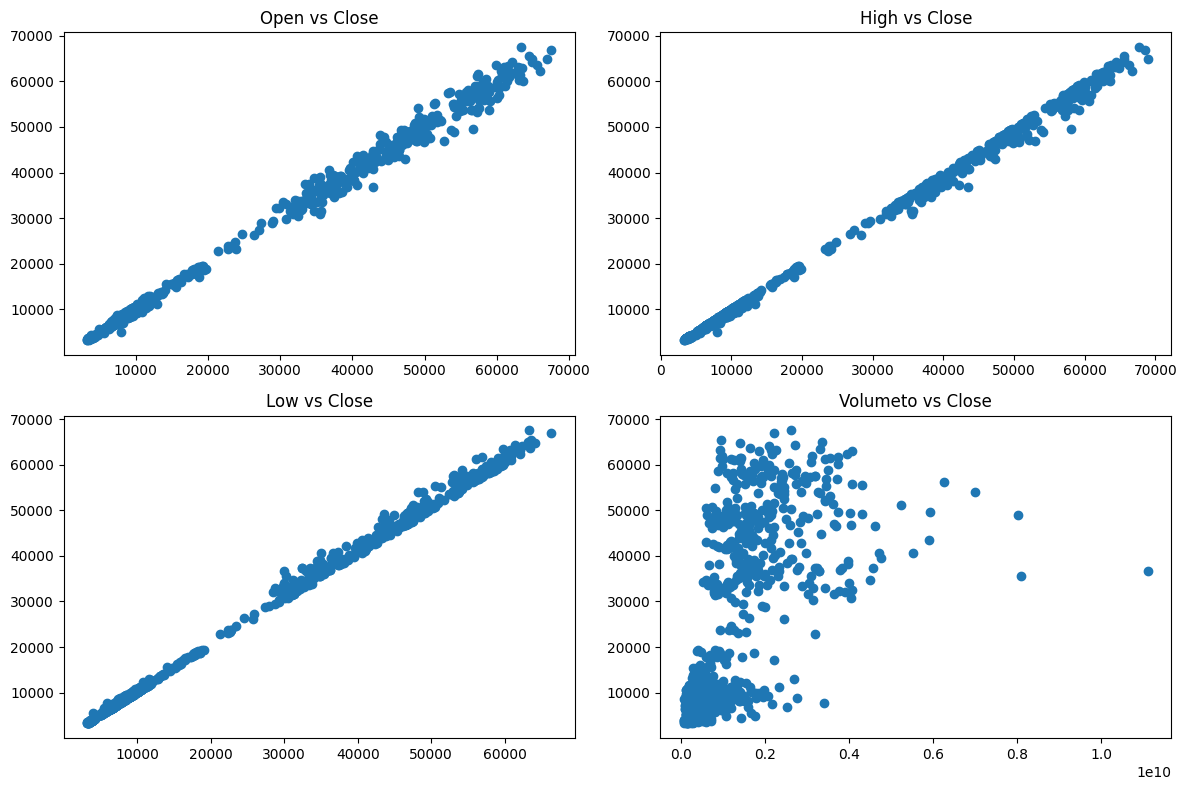

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].scatter(X_train['open'], y_train)
axs[0, 0].set_title('Open vs Close')

axs[0, 1].scatter(X_train['high'], y_train)
axs[0, 1].set_title('High vs Close')

axs[1, 0].scatter(X_train['low'], y_train)
axs[1, 0].set_title('Low vs Close')

axs[1, 1].scatter(X_train['volumeto'], y_train)
axs[1, 1].set_title('Volumeto vs Close')

plt.tight_layout()
plt.show()

In [15]:
alpha = 1.0
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)
w_ridge = ridge_model.coef_
b_ridge = ridge_model.intercept_
print(f"Ridge Regression - w = {w_ridge}, b = {b_ridge}")

Ridge Regression - w = [-5.09760074e-01  8.54261116e-01  6.51442746e-01  5.43821439e-08], b = -12.374813316633663


In [16]:
# Replace the values below with the values you want to predict
new_data_point = np.array([10226.86,10280.84,8726.95,1964308989.29]).reshape(1, -1)
predicted_close = ridge_model.predict(new_data_point)[0]
print(f"Ridge Regression - Predicted closing value for the provided parameters: {predicted_close}")

Ridge Regression - Predicted closing value for the provided parameters: 9348.833727525544


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [17]:
predictions_ridge_train = ridge_model.predict(X_train)
print(f"Ridge Regression - Prediction on training set:\n {predictions_ridge_train[:5]}")

Ridge Regression - Prediction on training set:
 [32536.14456648  9195.44123979  6935.53187964  3609.84257702
  4208.8905692 ]


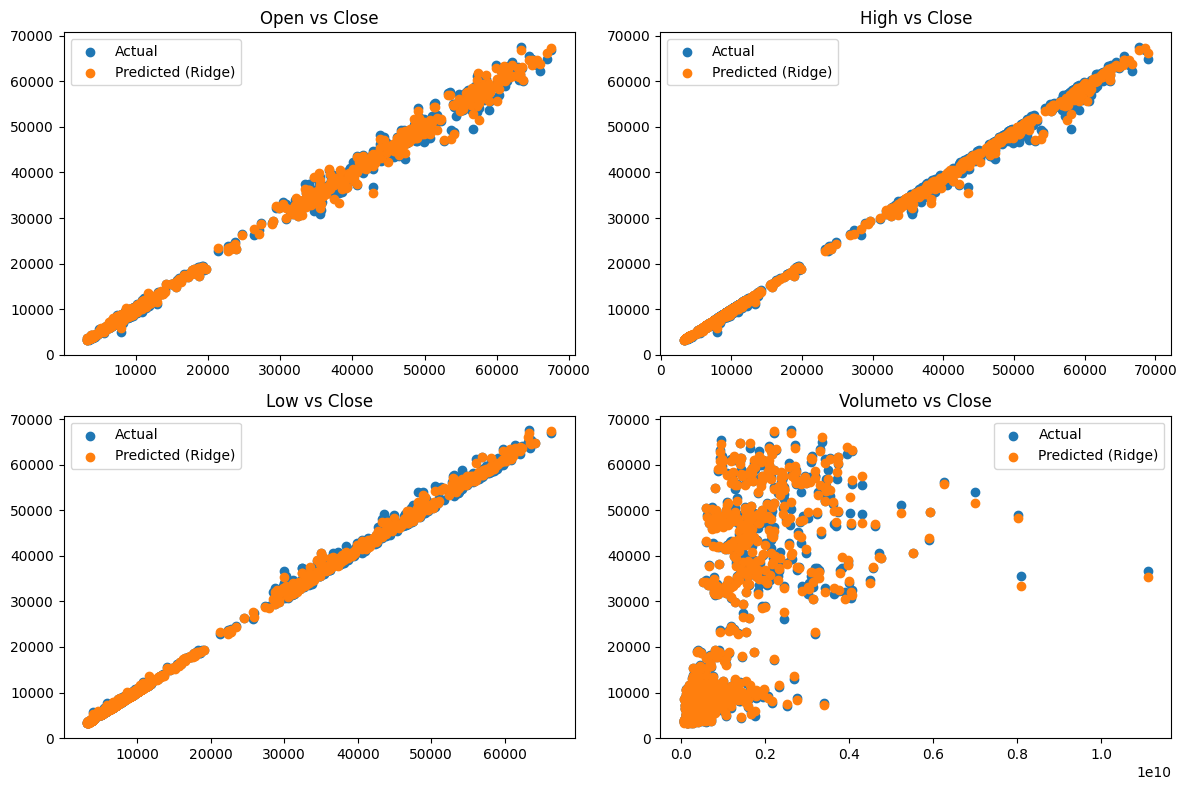

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].scatter(X_train['open'], y_train, label='Actual')
axs[0, 0].scatter(X_train['open'], predictions_ridge_train, label='Predicted (Ridge)')
axs[0, 0].set_title('Open vs Close')
axs[0, 0].legend()

axs[0, 1].scatter(X_train['high'], y_train, label='Actual')
axs[0, 1].scatter(X_train['high'], predictions_ridge_train, label='Predicted (Ridge)')
axs[0, 1].set_title('High vs Close')
axs[0, 1].legend()

axs[1, 0].scatter(X_train['low'], y_train, label='Actual')
axs[1, 0].scatter(X_train['low'], predictions_ridge_train, label='Predicted (Ridge)')
axs[1, 0].set_title('Low vs Close')
axs[1, 0].legend()

axs[1, 1].scatter(X_train['volumeto'], y_train, label='Actual')
axs[1, 1].scatter(X_train['volumeto'], predictions_ridge_train, label='Predicted (Ridge)')
axs[1, 1].set_title('Volumeto vs Close')
axs[1, 1].legend()

plt.tight_layout()
plt.show()